In [3]:
import os 

In [2]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import astropy
from astropy.stats import mad_std
from astropy.io import fits
from astropy.visualization import make_lupton_rgb
import scipy
from scipy import ndimage

In [7]:
bias1= astropy.io.fits.open('Bias_1x1_00001598.fit')
bias2= astropy.io.fits.open('Bias_1x1_00001599.fit')
bias3= astropy.io.fits.open('Bias_1x1_00001600.fit')
bias4= astropy.io.fits.open('Bias_1x1_00001601.fit')
bias5= astropy.io.fits.open('Bias_1x1_00001602.fit')
bias6= astropy.io.fits.open('Bias_1x1_00001603.fit')
bias7= astropy.io.fits.open('Bias_1x1_00001604.fit')
bias8= astropy.io.fits.open('Bias_1x1_00001605.fit')
bias9= astropy.io.fits.open('Bias_1x1_00001606.fit')

darkV1= astropy.io.fits.open('DARK_100sec_B11-001.fit')
darkV2= astropy.io.fits.open('DARK_100sec_B11-002.fit')
darkV3= astropy.io.fits.open('DARK_100sec_B11-003.fit')
darkV4= astropy.io.fits.open('DARK_100sec_B11-004.fit')
darkV5= astropy.io.fits.open('DARK_100sec_B11-005.fit')

flatV1 = astropy.io.fits.open('FLAT_V_B11-001.fit')
flatV2 = astropy.io.fits.open('FLAT_V_B11-002.fit')
flatV3 = astropy.io.fits.open('FLAT_V_B11-003.fit')
flatV4 = astropy.io.fits.open('FLAT_V_B11-004.fit')
flatV5 = astropy.io.fits.open('FLAT_V_B11-005.fit')

darkB1= astropy.io.fits.open('DARK_250sec_B11-001.fit')
darkB2= astropy.io.fits.open('DARK_250sec_B11-002.fit')
darkB3= astropy.io.fits.open('DARK_250sec_B11-003.fit')
darkB4= astropy.io.fits.open('DARK_250sec_B11-004.fit')
darkB5= astropy.io.fits.open('DARK_250sec_B11-005.fit')

flatB1 = astropy.io.fits.open('FLAT_B_B11-001.fit')
flatB2 = astropy.io.fits.open('FLAT_B_B11-002.fit')
flatB3 = astropy.io.fits.open('FLAT_B_B11-003.fit')
flatB4 = astropy.io.fits.open('FLAT_V_B11-004.fit')
flatB5 = astropy.io.fits.open('FLAT_V_B11-005.fit')


In [8]:
#Master BIAS
master_bias= np.mean(np.array([bias1[0].data,bias2[0].data,bias3[0].data,\
bias4[0].data,bias5[0].data,bias6[0].data,bias7[0].data,bias8[0].data,bias9[0].data]), axis=0)

#DARK V
dark_Vlist= np.array([darkV1[0].data, darkV2[0].data, darkV3[0].data, darkV4[0].data,\
darkV5[0].data]) - master_bias

#DARK B
dark_Blist= np.array([darkB1[0].data, darkB2[0].data, darkB3[0].data, darkB4[0].data,\
darkB5[0].data]) - master_bias

#Master DARK V
masterV_dark = np.median(dark_Vlist, axis = 0)
dark_V_bias= masterV_dark + master_bias

#Master DARK B
masterB_dark = np.median(dark_Blist, axis = 0)
dark_B_bias= masterB_dark + master_bias

#FLAT V y B

flatVlist = np.mean(np.array([flatV1[0].data, flatV2[0].data, flatV3[0].data, flatV4[0].data, flatV5[0].data]), axis=0)

flatBlist = np.mean(np.array([flatB1[0].data, flatB2[0].data, flatB3[0].data, flatB4[0].data,flatB5[0].data]), axis = 0)

#MASTER FLAT V y B

master_flatV = (flatVlist -dark_V_bias)/(np.median(flatVlist - dark_V_bias))

master_flatB = (flatBlist -dark_B_bias)/(np.median(flatBlist - dark_B_bias))

In [9]:
flatV1, flaV2, flatV3, flatV4, flatV5= (None,)*5

flatB1, flatB2, flatB3, flatB4,flatB5 = (None,)*5

darkV1,darkV2,darkV3,darkV4,darkV5 = (None,)*5

darkB1,darkB2,darkB3,darkB4,darkB5 = (None,)*5

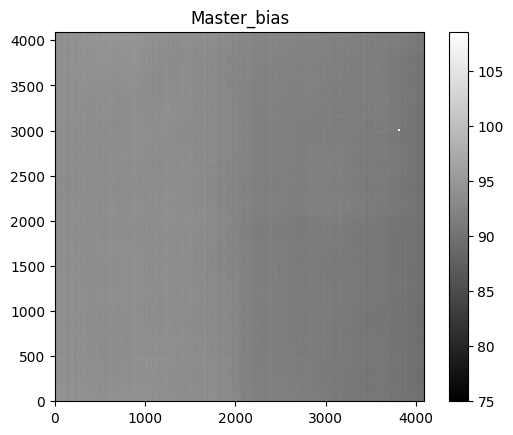

<Figure size 640x480 with 0 Axes>

In [10]:
plt.imshow(master_bias, cmap='gray', vmin=75, vmax=np.mean(master_bias)+np.std(master_bias), origin= 'lower')
plt.title('Master_bias')
plt.colorbar()
plt.show()
plt.savefig('Master_bias')

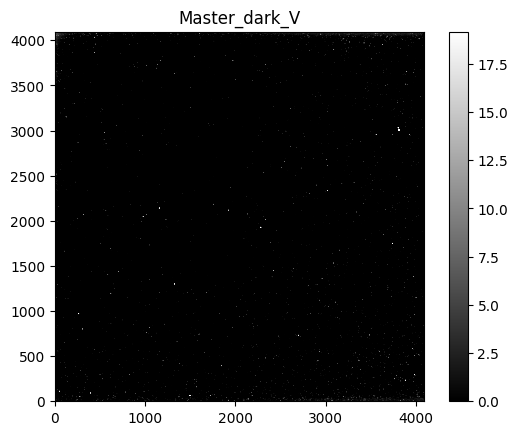

<Figure size 640x480 with 0 Axes>

In [11]:
#Ver que onda con el color bar

plt.imshow(masterV_dark, cmap='gray', vmin=0, vmax=np.mean(masterV_dark)+np.std(masterV_dark), origin= 'lower')
plt.title('Master_dark_V')
plt.colorbar()
plt.show()
plt.savefig('Master_dark_V normalizado')

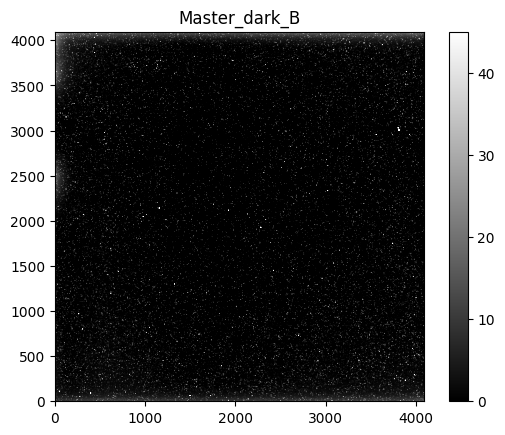

<Figure size 640x480 with 0 Axes>

In [12]:
plt.imshow(masterB_dark, cmap='gray', vmin=0, vmax=np.mean(masterB_dark)+np.std(masterB_dark), origin= 'lower')
plt.title('Master_dark_B')
plt.colorbar()
plt.show()
plt.savefig('Master_dark_B normalizado')

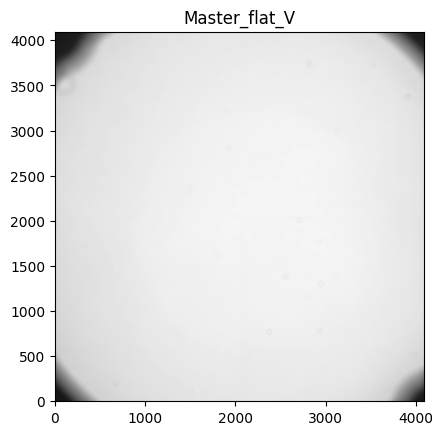

<Figure size 640x480 with 0 Axes>

In [13]:
plt.imshow(master_flatV, cmap='gray', vmin=0, vmax=np.mean(master_flatV)+np.std(master_flatV), origin='lower')
plt.title('Master_flat_V')
plt.show()
plt.savefig('Master_flat_V normalizado')

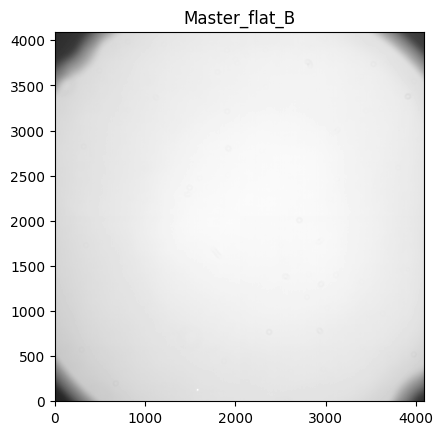

<Figure size 640x480 with 0 Axes>

In [14]:
plt.imshow(master_flatB, cmap='gray', vmin=0, vmax=np.mean(master_flatB)+np.std(master_flatB), origin='lower')
plt.title('Master_flat_B')
plt.show()
plt.savefig('Master_flat_B normalizado')

In [15]:
np.random.seed(1)
px = np.random.randint(0,4096,size=100)
py=np.random.randint(0,4096,size=100)
rayos=np.vstack([px,py]).T
B1= astropy.io.fits.open('Light_NGC_6523_B_250.000secs_00001338.fit')
B1d= B1[0].data
for i in range(100):
    B1d[rayos[i,0],rayos[i,1]]=60000 
    B1d[rayos[i,0],rayos[i,1]+1]=60000
    B1d[rayos[i,0],rayos[i,1]+2]=60000
    B1d[rayos[i,0],rayos[i,1]+3]=60000
    B1d[rayos[i,0],rayos[i,1]-1]=60000
    B1d[rayos[i,0],rayos[i,1]-2]=60000
    B1d[rayos[i,0],rayos[i,1]-3]=60000
    
np.random.seed(2)
px2=np.random.randint(0,4096,size=100)
py2=np.random.randint(0,4096,size=100)
rayos2=np.vstack([px2,py2]).T
B2= astropy.io.fits.open('Light_NGC_6523_B_250.000secs_00001339.fit')
B2d= B2[0].data
for i in range(100):
    B2d[rayos2[i,0],rayos2[i,1]]=60000 
    B2d[rayos2[i,0],rayos2[i,1]+1]=60000
    B2d[rayos2[i,0],rayos2[i,1]+2]=60000
    B2d[rayos2[i,0],rayos2[i,1]+3]=60000
    B2d[rayos2[i,0],rayos2[i,1]-1]=60000
    B2d[rayos2[i,0],rayos2[i,1]-2]=60000
    B2d[rayos2[i,0],rayos2[i,1]-3]=60000

np.random.seed(3)
px3=np.random.randint(0,4096,size=100)
py3=np.random.randint(0,4096,size=100)
rayos3=np.vstack([px3,py3]).T
B3= astropy.io.fits.open('Light_NGC_6523_B_250.000secs_00001340.fit')
B3d= B3[0].data
for i in range(100):
    B3d[rayos3[i,0],rayos3[i,1]]=60000 
    B3d[rayos3[i,0],rayos3[i,1]+1]=60000
    B3d[rayos3[i,0],rayos3[i,1]+2]=60000
    B3d[rayos3[i,0],rayos3[i,1]+3]=60000
    B3d[rayos3[i,0],rayos3[i,1]-1]=60000
    B3d[rayos3[i,0],rayos3[i,1]-2]=60000
    B3d[rayos3[i,0],rayos3[i,1]-3]=60000

np.random.seed(4)
px10=np.random.randint(0,4096,size=100)
py10=np.random.randint(0,4096,size=100)
rayos10=np.vstack([px10,py10]).T
V1= astropy.io.fits.open('Light_NGC_6523_V_100.000secs_00001334.fit')
V1d= V1[0].data
for i in range(100):
    V1d[rayos10[i,0],rayos10[i,1]]=60000 
    V1d[rayos10[i,0],rayos10[i,1]+1]=60000
    V1d[rayos10[i,0],rayos10[i,1]+2]=60000
    V1d[rayos10[i,0],rayos10[i,1]+3]=60000
    V1d[rayos10[i,0],rayos10[i,1]-1]=60000
    V1d[rayos10[i,0],rayos10[i,1]-2]=60000
    V1d[rayos10[i,0],rayos10[i,1]-3]=60000

np.random.seed(11)
px11=np.random.randint(0,4096,size=100)
py11=np.random.randint(0,4096,size=100)
rayos11=np.vstack([px11,py11]).T
V2= astropy.io.fits.open('Light_NGC_6523_V_100.000secs_00001335.fit')
V2d= V2[0].data
for i in range(100):
    V2d[rayos11[i,0],rayos11[i,1]]=60000 
    V2d[rayos11[i,0],rayos11[i,1]+1]=60000
    V2d[rayos11[i,0],rayos11[i,1]+2]=60000
    V2d[rayos11[i,0],rayos11[i,1]+3]=60000
    V2d[rayos11[i,0],rayos11[i,1]-1]=60000
    V2d[rayos11[i,0],rayos11[i,1]-2]=60000
    V2d[rayos11[i,0],rayos11[i,1]-3]=60000 
    
np.random.seed(12)
px12=np.random.randint(0,4096,size=100)
py12=np.random.randint(0,4096,size=100)
rayos12=np.vstack([px12,py12]).T
V3= astropy.io.fits.open('Light_NGC_6523_V_100.000secs_00001336.fit')
V3d= V3[0].data
for i in range(100):
    V3d[rayos12[i,0],rayos12[i,1]]=60000 
    V3d[rayos12[i,0],rayos12[i,1]+1]=60000
    V3d[rayos12[i,0],rayos12[i,1]+2]=60000
    V3d[rayos12[i,0],rayos12[i,1]+3]=60000
    V3d[rayos12[i,0],rayos12[i,1]-1]=60000
    V3d[rayos12[i,0],rayos12[i,1]-2]=60000
    V3d[rayos12[i,0],rayos12[i,1]-3]=60000 

In [16]:
BR1=(B1d-dark_B_bias)/(master_flatB)

BR2=(B2d-dark_B_bias)/(master_flatB)

BR3=(B3d-dark_B_bias)/(master_flatB)

VR1 = (V1d - dark_V_bias)/(master_flatV)

VR2 = (V2d - dark_V_bias)/(master_flatV)

VR3 = (V3d - dark_V_bias)/(master_flatV)

C:\Users\Sofía\AppData\Local\Temp\ipykernel_24828\2345919176.py:1: RuntimeWarning: invalid value encountered in divide
  BR1=(B1d-dark_B_bias)/(master_flatB)
C:\Users\Sofía\AppData\Local\Temp\ipykernel_24828\2345919176.py:3: RuntimeWarning: invalid value encountered in divide
  BR2=(B2d-dark_B_bias)/(master_flatB)
C:\Users\Sofía\AppData\Local\Temp\ipykernel_24828\2345919176.py:5: RuntimeWarning: invalid value encountered in divide
  BR3=(B3d-dark_B_bias)/(master_flatB)
C:\Users\Sofía\AppData\Local\Temp\ipykernel_24828\2345919176.py:7: RuntimeWarning: invalid value encountered in divide
  VR1 = (V1d - dark_V_bias)/(master_flatV)
C:\Users\Sofía\AppData\Local\Temp\ipykernel_24828\2345919176.py:9: RuntimeWarning: invalid value encountered in divide
  VR2 = (V2d - dark_V_bias)/(master_flatV)
C:\Users\Sofía\AppData\Local\Temp\ipykernel_24828\2345919176.py:11: RuntimeWarning: invalid value encountered in divide
  VR3 = (V3d - dark_V_bias)/(master_flatV)


In [17]:
B = np.median(np.array([BR1,BR2,BR3]),axis=0)
V = np.median(np.array([VR1,VR2,VR3]),axis=0)

B[B < 0] = 0
V[V <0] = 0

B_raw = np.median(np.array([B1[0].data, B2[0].data, B3[0].data]), axis=0)
V_raw = np.median(np.array([V1[0].data, V2[0].data, V3[0].data]), axis=0)

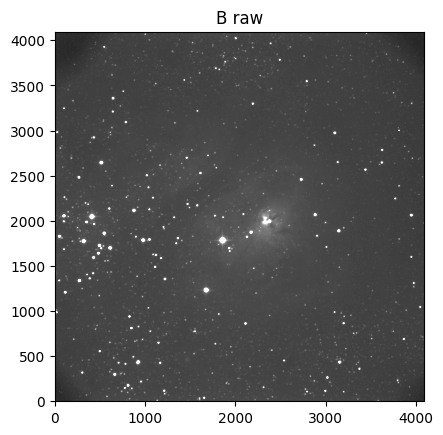

In [18]:
plt.imshow(B_raw, cmap='gray', vmin=0, vmax= np.mean(B_raw)+ np.std(B_raw), origin='lower')
plt.title('B raw')
plt.show()
plt.savefig('B raw')
plt.close()

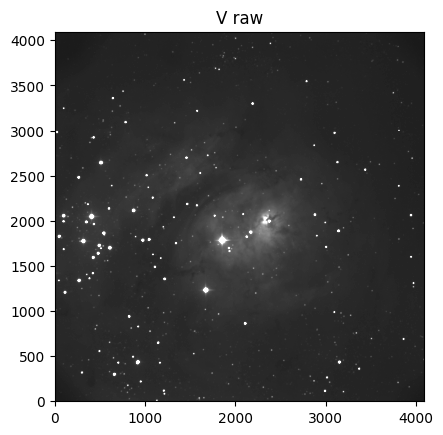

In [19]:
plt.imshow(V_raw, cmap='gray', vmin=0, vmax= np.mean(V_raw)+ np.std(V_raw), origin='lower')
plt.title('V raw')
plt.show()
plt.savefig('V raw')
plt.close()

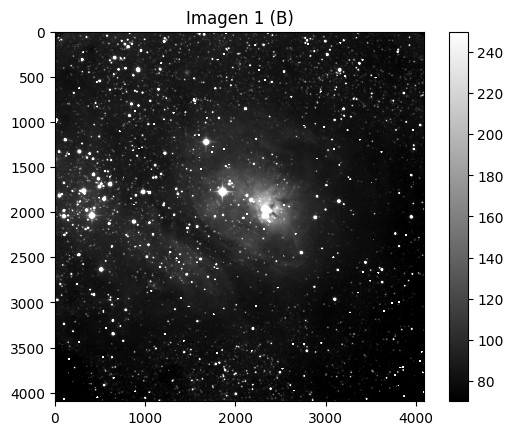

In [20]:
plt.imshow(BR1,cmap='gray',vmin=70, vmax=250)
plt.title('Imagen 1 (B)') #con rayos cosmicos
plt.colorbar()
plt.savefig('BR1 con rayos')
plt.show()

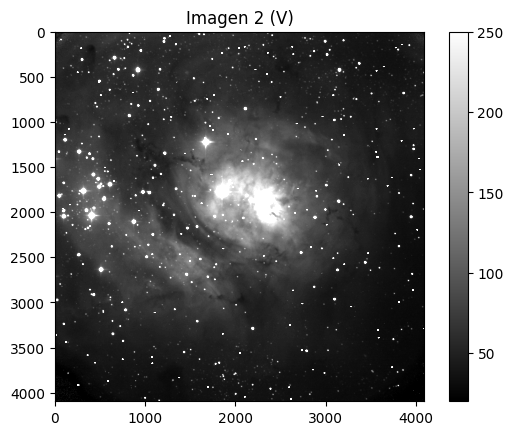

In [21]:
plt.imshow(VR1,cmap='gray',vmin=20, vmax=250)
plt.title('Imagen 2 (V)') #con rayos cosmicos
plt.colorbar()
plt.savefig('VR1 con rayos')
plt.show()

C:\Users\Sofía\AppData\Local\Temp\ipykernel_24828\1805763821.py:1: RuntimeWarning: invalid value encountered in divide
  V1dredux = (V1d - dark_V_bias)/master_flatV #plot de unas imagenes con filtro V y agregandole rayos cosmicos


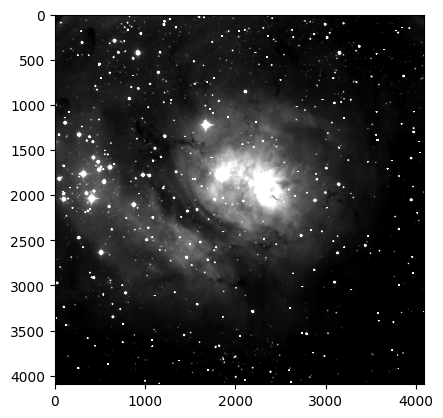

In [22]:
V1dredux = (V1d - dark_V_bias)/master_flatV #plot de unas imagenes con filtro V y agregandole rayos cosmicos
plt.imshow(V1dredux, cmap='gray', vmin=40, vmax=250)
plt.show()

C:\Users\Sofía\AppData\Local\Temp\ipykernel_24828\2548189253.py:1: RuntimeWarning: invalid value encountered in divide
  B1dredux = (B1d - dark_B_bias)/master_flatB #plot de unas imagenes con filtro B y agregandole rayos cosmicos


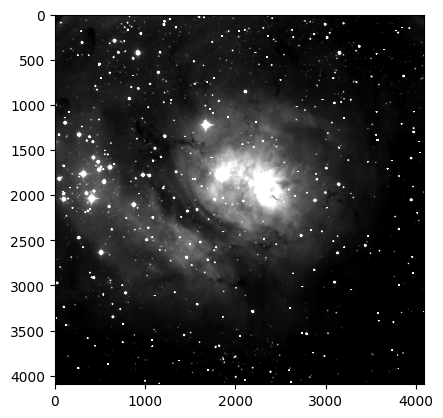

In [23]:
B1dredux = (B1d - dark_B_bias)/master_flatB #plot de unas imagenes con filtro B y agregandole rayos cosmicos
plt.imshow(V1dredux, cmap='gray', vmin=40, vmax=250)
plt.show()

DESDE AQUÍ PARA ABAJO, NO ENTIENDO NADA

In [73]:
## Definimos nuestro kernel de boxcar.

boxcar=(np.vstack([np.ones(3),np.ones(3),np.ones(3)]).T)/6

In [74]:
#Aplicamos 3 filtros diferentes a cada imagen profunda (Gaussiano,Laplaciano y Boxcar)
gaussV=scipy.ndimage.gaussian_filter(V,5)
laplaceV=scipy.ndimage.uniform_filter(V)
boxcarV=scipy.ndimage.convolve(V,boxcar)

In [75]:
gaussB=scipy.ndimage.gaussian_filter(B,5)
laplaceB=scipy.ndimage.uniform_filter(B)
boxcarB=scipy.ndimage.convolve(B,boxcar)

In [77]:
#Generamos 2 versiones sharpened de cada imagen

unsharp_g_V=2*V-gaussV
unsharp_l_V=V-laplaceV

unsharp_g_B=2*B-gaussB
unsharp_l_B=B-laplaceB

In [78]:
#Sharpened para el filtro V
plt.imshow(unsharp_g_V[500:3000, 500:3000], cmap='gray', vmin=0, vmax=np.mean(unsharp_g_V)+np.std(unsharp_g_V))
plt.title('sharpened 1 V')
plt.colorbar()
plt.savefig('Sharpened 1V')
plt.close()

plt.imshow(unsharp_l_V[500:3000, 500:3000], cmap='gray', vmin=0, vmax=np.mean(unsharp_l_V)+np.std(unsharp_l_V))
plt.title('sharpened 2 V')
plt.colorbar()
plt.savefig('Sharpened 2V')
plt.close()


#Sharpened para el filtro B
plt.imshow(unsharp_g_B[500:3000, 500:3000], cmap='gray', vmin=0, vmax=np.mean(unsharp_g_B)+np.std(unsharp_g_B))
plt.title('sharpened 1 B')
plt.colorbar()
plt.savefig('Sharpened 1B')
plt.close()

plt.imshow(unsharp_l_B[500:3000, 500:3000], cmap='gray', vmin=0, vmax=np.mean(unsharp_l_B)+np.std(unsharp_l_B))
plt.title('sharpened 2 B')
plt.colorbar()
plt.savefig('Sharpened 2B')
plt.close()

In [79]:
plt.imshow(unsharp_g_V[1500:2500, 1500:2500], cmap='gray', vmin=0, vmax=np.mean(unsharp_g_V)+np.std(unsharp_g_V))
plt.title('sharpened 1 V')
plt.colorbar()
plt.savefig('Sharpened 1V')
plt.close()

In [82]:
#Definimos nuestros kernels arbitrarios
Filtro1=np.array([[3,-2,3],[-2,1,-2],[3,-2,3]])
Filtro2=np.array([[1,1,1],[1,-9,1],[1,1,1]])
Filtro3=np.array([[3,3,3],[3,0,3],[3,3,3]])

In [83]:
#Aplicamos estos filtros inventados en cada imagen
f1V=scipy.ndimage.convolve(V,Filtro1)
f2V=scipy.ndimage.convolve(V,Filtro2)
f3V=scipy.ndimage.convolve(V,Filtro3)

f1B=scipy.ndimage.convolve(B,Filtro1)
f2B=scipy.ndimage.convolve(B,Filtro2)
f3B=scipy.ndimage.convolve(B,Filtro3)

In [23]:
#Finalmente obtenemos una imagen rgb a color
#rgb= make_lupton_rgb(Si,Sr,Sg,stretch=130, Q=5)
#plt.imshow(rgb[1800:2300, 1800:2300], origin='lower')
#plt.colorbar()
#plt.savefig('rgb3.png',dpi='figure')
#plt.close()

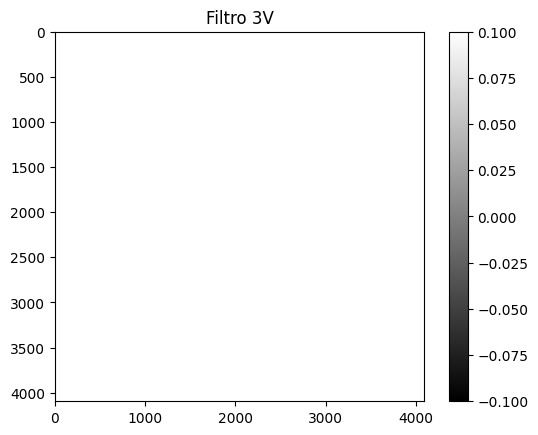

In [86]:
#plot de los filtros para V
plt.imshow(f1V,cmap='gray',vmin=-5,vmax=np.mean(f1V)+np.std(f1V))
plt.title('Filtro 1V')
plt.colorbar()
plt.savefig('Filtro 1V')
plt.close()

plt.imshow(f2V,cmap='gray',vmin=-5,vmax=np.mean(f2V)+np.std(f2V))
plt.title('Filtro 2V')
plt.colorbar()
plt.savefig('Filtro 2V')
plt.close()

plt.imshow(f3V,cmap='gray',vmin=-5,vmax=np.mean(f3V)+np.std(f3V))
plt.title('Filtro 3V')
plt.colorbar()
plt.savefig('Filtro 3V')

In [90]:
#plot de los filtros para B
plt.imshow(f1B,cmap='gray',vmin=0,vmax=np.mean(f1B)+np.std(f1B))
plt.title('Filtro 1 Sloan i')
plt.colorbar()
plt.savefig('Filtro 1Sloan i')
plt.close()

plt.imshow(f2B,cmap='gray',vmin=-50,vmax=np.mean(f2B)+np.std(f2B))
plt.title('Filtro 2 Sloan i')
plt.colorbar()
plt.savefig('Filtro 2Sloan i')
plt.close()

plt.imshow(f3B,cmap='gray',vmin=0,vmax=np.mean(f3B)+np.std(f3B))
plt.title('Filtro 3Sloan i')
plt.colorbar()
plt.savefig('Filtro 3Sloan i')
plt.close()

In [87]:
plt.imshow(gaussV,cmap='gray',vmin=0,vmax=np.mean(gaussV)+np.std(gaussV))
plt.title('gaussV')
plt.colorbar()
plt.savefig('gaussV')
plt.close()

In [88]:
plt.imshow(laplaceV,cmap='gray',vmin=0,vmax=np.mean(laplaceV)+np.std(laplaceV))
plt.title('laplaceV')
plt.colorbar()
plt.savefig('laplaceV')
plt.close()

In [89]:
plt.imshow(boxcarV,cmap='gray',vmin=0,vmax=np.mean(boxcarV)+np.std(boxcarV))
plt.title('boxcarV')
plt.colorbar()
plt.savefig('boxcarV')
plt.close()